# Thống kê suy luận

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set()

### Bài tập: Kiểm định giả thuyết

Dữ liệu: Tập dữ liệu bao gồm các điểm của học sinh trong các môn học khác nhau.

In [10]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18436\3030859865.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['math score'], label='match score')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18436\3030859865.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['reading score'], label='rea

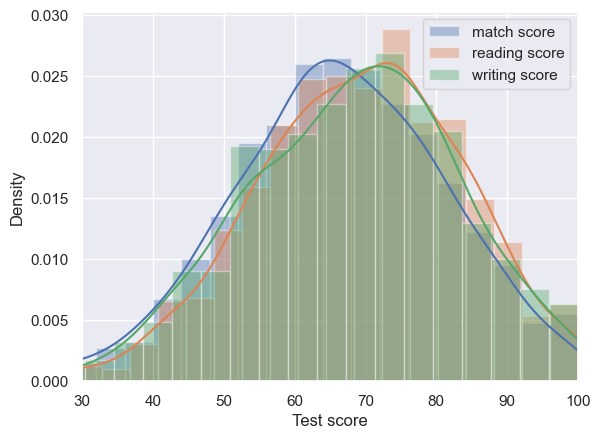

In [12]:
sns.distplot(df['math score'], label='match score')
sns.distplot(df['reading score'], label='reading score')
sns.distplot(df['writing score'], label='writing score')
plt.xlim(30, 100)
plt.xlabel('Test score')
plt.legend();

In [13]:
df.mean()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18436\3698961737.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


math score       66.089
reading score    69.169
writing score    68.054
dtype: float64

### BTVN
Kiểm định giả thuyết không có sự khác nhau về điểm trung bình giữa học sinh tham gia và không tham gia bài kiểm tra trước khoá học. Lựa chọn alpha = 0.05.
- Hãy thực hiện theo ít nhất 1 trong những cách sau: sử dụng công thức (nếu được, tham khảo https://en.wikipedia.org/wiki/Student%27s_t-test#Equal_or_unequal_sample_sizes,_unequal_variances_(sX1_%3E_2sX2_or_sX2_%3E_2sX1) và sử dụng thư viện.
- Vẽ phân bố xác suất tương ứng và vị trí của các điểm statistic và critical.

In [14]:
df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

Your code goes here

In [15]:
#nhận xét: 
# đây là kiểm định giả thuyết giữa hai sample khác nhau
# call: n1, x1, u1, sigma1 thuộc none
# call: n2, x2, u2, sigma2 thuộc complete

**STEP 1: TÁCH 2 MẪU TƯƠNG XỨNG VỚI HAI TÍNH CHẤT NONE VÀ COMPLETED**

In [21]:
df_none = df[df['test preparation course']=='none']
df_none.reset_index(drop=True,inplace=True)
df_none.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group B,master's degree,standard,none,90,95,93
2,male,group A,associate's degree,free/reduced,none,47,57,44
3,male,group C,some college,standard,none,76,78,75
4,female,group B,associate's degree,standard,none,71,83,78


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18436\3421637627.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_none['math score'], label='match score')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18436\3421637627.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_none['reading score'], 

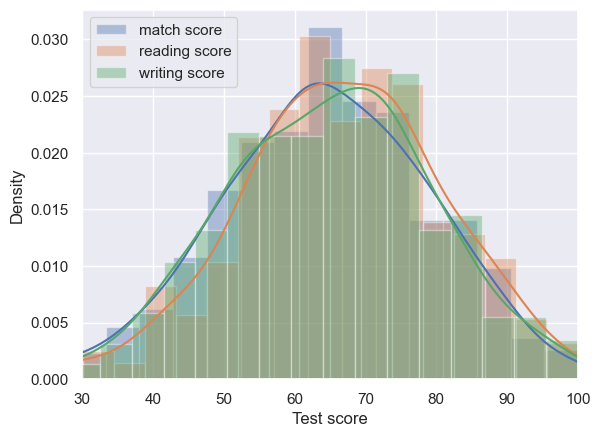

In [58]:
sns.distplot(df_none['math score'], label='match score')
sns.distplot(df_none['reading score'], label='reading score')
sns.distplot(df_none['writing score'], label='writing score')
plt.xlim(30, 100)
plt.xlabel('Test score')
plt.legend();

In [23]:
df_completed = df[df['test preparation course']=='completed']
df_completed.reset_index(drop=True,inplace=True)
df_completed.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some college,standard,completed,69,90,88
1,female,group B,some college,standard,completed,88,95,92
2,male,group D,high school,free/reduced,completed,64,64,67
3,male,group A,some college,standard,completed,78,72,70
4,male,group C,master's degree,free/reduced,completed,46,42,46


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18436\827028045.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_completed['math score'], label='match score')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18436\827028045.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_completed['reading s

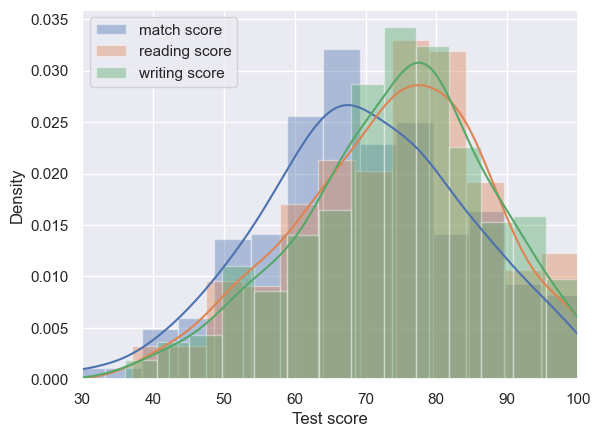

In [59]:
sns.distplot(df_completed['math score'], label='match score')
sns.distplot(df_completed['reading score'], label='reading score')
sns.distplot(df_completed['writing score'], label='writing score')
plt.xlim(30, 100)
plt.xlabel('Test score')
plt.legend();

**TẠO THÊM CỘT DỮ LIỆU LÀ ĐIỂM AVERAGE CỦA MATH, READING, WRITING**

In [28]:
df_none['Average score'] = df_none[['math score', 'reading score', 'writing score']].mean(axis=1)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18436\3317069998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_none.loc['Average score'] = df_none[['math score', 'reading score', 'writing score']].mean(axis=1)


In [29]:
df_completed['Average score'] = df_completed[['math score','reading score','writing score']].mean(axis=1) 

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18436\395285300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_completed['Average score'] = df_completed[['math score','reading score','writing score']].mean(axis=1)


**STEP 2: DATA MINING: TÌM KIẾM THÔNG SỐ CHO 2 MẪU**

In [33]:
# thiết lâp hàm test
import operator

def test (a,b,cmp,cname=None):
    if cname is None:
        cname = cmp.__name__
    assert cmp(a,b),f"{cname}: \n{a}\n{b}"

def test_eq(a,b):
    test(a,b, operator.eq(),'==')
    
def near(a,b):
    return np.allclose(a,b,rtol=1e-3,atol=1e-5)

def test_near(a,b):
    test(a,b,near)

# None

In [30]:
df_none.describe()

,math score,reading score,writing score,Average score
count,642.000000,642.000000,642.000000,642.000000
mean,64.077882,66.534268,64.504673,65.038941
std,15.192376,14.463885,14.999661,14.186707
min,0.000000,17.000000,10.000000,9.000000
25%,54.000000,57.000000,54.000000,55.416667
50%,64.000000,67.000000,65.000000,65.333333
75%,74.750000,76.000000,74.000000,75.000000
max,100.000000,100.000000,100.000000,100.000000


In [35]:
mean_none = df_none['Average score'].mean()
std_none = df_none['Average score'].std()
n1 = 642

In [37]:
test_near(mean_none, 65.038941)
test_near(std_none, 14.186707)
# PASS

# Completed

In [31]:
df_completed.describe()

,math score,reading score,writing score,Average score
count,358.000000,358.000000,358.000000,358.000000
mean,69.695531,73.893855,74.418994,72.669460
std,14.444699,13.638384,13.375335,13.036960
min,23.000000,37.000000,36.000000,34.333333
25%,60.000000,65.000000,66.000000,65.000000
50%,69.000000,75.000000,76.000000,73.500000
75%,79.000000,84.000000,83.000000,82.166667
max,100.000000,100.000000,100.000000,100.000000


In [38]:
mean_completed = df_completed['Average score'].mean()
std_completed = df_completed['Average score'].std()
n2 = 358

**STEP 3: TEST HYPOTHESIS**

# Đặt giả thuyết, significant level: 0.05
null hypothesis H0: mean_none = mean_completed

alternative hypothesis Ha: mean_none != mean_completed => **2-tailed test**

steps: 
1. tính toán dof
2. tính toán Z critical
3. tính toán Z statistic
4. vẽ đồ thị 
5. kết luận


In [40]:
alpha = 0.05 

In [39]:
dof = n1 + n2 - 2
dof

998

In [43]:
from scipy.stats import norm

Z_critical = norm.ppf(1-alpha/2)
Z_critical

1.959963984540054

$$ Z = \frac{(\bar{x}_1 - \bar{x}_2)}{\sqrt{\frac{{\sigma_1^2}}{n_1} + \frac{{\sigma_2^2}}{n_2}}} $$


In [ ]:
# call: x1, sigma1, n1 thuộc none
# call: x2, sigma2, n2 thuộc completed

In [50]:
def z_statistic_ind(x1,x2,sigma1,sigma2,n1,n2):
    part_1 = (x1 - x2)
    
    part_2 = 1/ (np.sqrt(((sigma1**2)/n1) + ((sigma2**2)/n2)))
    
    return part_1 * part_2;

In [51]:
Z_statistic = z_statistic_ind(mean_none,mean_completed,std_none,std_completed,n1,n2)
Z_statistic

-8.594538326688614

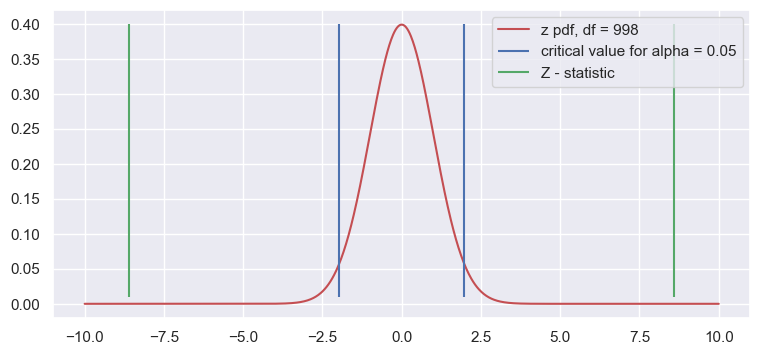

In [55]:
# graph
x = np.linspace(-10,10,1000)
y = stats.t.pdf(x,dof)

plt.figure(figsize = (9,4), dpi=100)
plt.plot(x,y,'r',label=f'z pdf, df = {dof}')

plt.vlines(x=[stats.t.ppf(alpha/2,dof),-stats.t.ppf(alpha/2,dof)],ymin=0.01,ymax=0.4,
           label=f"critical value for alpha = {alpha}",color='b')
plt.vlines(x=[Z_statistic,-Z_statistic],ymin=0.01,ymax=0.4,
          label=f"Z - statistic",color='g')
plt.legend();
    

In [57]:
if abs(Z_statistic) > Z_critical:
    print("Reject H0: mean_1 = mean_2")
    print("giả thuyết điểm trung bình của completed và none là khác nhau")
else:
    print("false to reject H0")
    print("chưa đủ cơ sở để bác bỏ H0")

Reject H0: mean_1 = mean_2
giả thuyết điểm trung bình của completed và none là khác nhau
